# Expectation-Maximization

In this assignment we will be using the Expectation Maximization method to estimate the parameters of the same three coin experiment as in the theoretical part. We will examine the behavior of the algorithm for various combinations of parameters.

## Description of the Experiment

The following procedure generates the data for the three coin experiment.

The parameters are:

- $\lambda$ := The probability of heads on the hidden coin H.

- $p_1$ := The probability of heads on coin A.

- $p_2$ := The probability of heads on coin B.

Each of the $N$ samples is collected the following way:

- The secret coin (H) is tossed.

- If the result is heads, coin A is tossed $M$ times and the results are recorded.

- If the result is tails, coin B is tossed $M$ times and the results are recorded.

**Heads are recorded as 1.** 

**Tails are recorded as 0.**

The data is returned as an **$N \times M$** matrix, where each of the $N$ rows correspond to the trials and contains the results of the corresponding sample (generated either by coin A or by coin B).

## Description of Provided Functions

Three functions are provided for your convenience:

*  **`utils.generateData(lambda,p1,p2,N,M)`:** Performs the experiment $N$ times with coin parameters specified as argument and returns the results in a $N \times M$ matrix.


* **`utils.unknownData()`** Returns a dataset of size $N \times M$ where generation parameters are unknown.


*  **`utils.plot(data,distribution)`:** Plot a histogram of the number of heads per trial along with the probability distribution. This function will be used to visualize the progress of the EM algorithm at every iteration.

An example of use of these two functions is given below:

[[1 0 0 0 0]
 [0 0 0 0 0]
 [1 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 1 0 0 0]
 [1 1 1 1 0]
 [0 0 0 1 0]
 [1 1 1 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [1 1 1 1 1]]


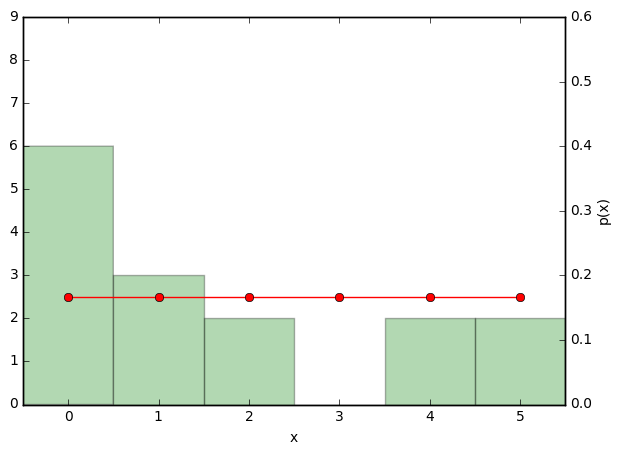

In [70]:
%matplotlib inline
import numpy,utils

# Print the data matrix as a result of the three coins experiment with parameter 0.5, 0.8 and 0.2.
data = utils.generateData(0.5,0.8,0.2,15,5)
print(data)

# Print the data histogram along with a uniform probability distribution.
utils.plot(data,numpy.ones([data.shape[1]+1])/(data.shape[1]+1))

## Calculate the Log-Likelihood (10 P)

Implement a function which calculates the log likelihood for a given dataset and parameters. The log-likelihood is given by:
$$
LL = \frac1N \sum_{i=1}^N \log \!\! \sum_{z \in \{\mathrm{heads},\mathrm{tails}\}} \!\! P(X=x_i, Z=z \mid \theta)\\
   = \frac1N \sum_{i=1}^N \log \left[ \lambda \cdot p_1^{h(x_i)} \cdot (1-p_1)^{t(x_i)} + (1-\lambda) \cdot p_2^{h(x_i)} \cdot (1-p_2)^{t(x_i)} \right]
$$
where $h(x_i)$ and $t(x_i)$ denote the number of heads and tails in sample $i$, respectively. Note that we take the averaged log-likelihood over all trials, hence the multiplicative term $\frac1N$ in front.

#### Remark
* Although we tried to copy the formula from above, we get results that are too large. Note that this will later cause our EM-algorithm to run a little longer since the threshold value (difference of loglikelihoods) is reached later.

In [71]:
def loglikelihood(data,lam,p1,p2):
    from math import log
    N,M = data.shape
    LL = 0
    for n in range(N):
        h = sum(data[n,:])
        t = M - h
        LL += log(lam*p1**h * (1-p1)**t + (1-lam)*p2**h * (1-p2)**t)
    LL = LL/N
    return(LL)
## checks:
#loglikelihood(utils.generateData(0.5,0.8,0.2,15,5), 0.5,0.8,0.2)
#loglikelihood(data = utils.unknownData(), lam = .5, p1 = .25, p2 = .75)

## Implementing and Running the EM Algorithm (30 P)

Implement a function which iteratively determines the values of $\lambda$, $p_1$ and $p_2$. The function starts with some initial estimates for the parameters and returns the results of the method for those parameters.

In each iteration, the following update rules are used for the parameters:

$$\lambda^{new} = \frac{E(\#heads(coin\_H))}{\#throws(coin\_H)} = \frac{1}{N}\sum_{i=1}^{N}\frac{\lambda p_1^{h(x_i)}(1-p_1)^{t(x_i)}}{\lambda p_1^{h(x_i)}(1-p_1)^{t(x_i)} + (1-\lambda)p_2^{h(x_i)}(1-p_2)^{t(x_i)}}$$

$$p_1^{new} = \frac{E(\#heads(coin\_A))}{E(\#throws(coin\_A))} = \frac{\sum_{i=1}^{N}R_1(i)h(x_i)}{M \sum_{i=1}^{N}R_1(i)}$$

$$p_2^{new} = \frac{E(\#heads(coin\_B))}{E(\#throws(coin\_B))} = \frac{\sum_{i=1}^{N}R_2(i)h(x_i)}{M \sum_{i=1}^{N}R_2(i)}$$

where $h(x_i)$ and $t(x_i)$ denote the number of heads and tails in sample i, respectively, and

$$R_1(i) = \frac{\lambda p_1^{h(x_i)}(1-p_1)^{t(x_i)}}{\lambda p_1^{h(x_i)}(1-p_1)^{t(x_i)} + (1-\lambda)p_2^{h(x_i)}(1-p_2)^{t(x_i)}}$$

$$R_2(i) = \frac{(1-\lambda) p_2^{h(x_i)}(1-p_2)^{t(x_i)}}{\lambda p_1^{h(x_i)}(1-p_1)^{t(x_i)} + (1-\lambda)p_2^{h(x_i)}(1-p_2)^{t(x_i)}}$$


**TODO:**

* **Implement the EM learning procedure.**
* **Use as stopping criterion the improvement of log-likelihood between two iterations to be smaller than $0.001$.**
* **Run the EM procedure on the data returned by function `utils.unknownData()`. Use as an initial solution for your model the parameters $\lambda = 0.5$, $p_1 = 0.25$, $p_2 = 0.75$ **.
* **At each iteration of the EM procedure, print the log-likelihood and the value of your model parameters, and plot the learned probability distribution using the function utils.plot().**

In [72]:
def update_lambda(data, lam, p1, p2):
    N = data.shape[0]
    M = data.shape[1]
    lam_upd = 0
    for n in range(N):
        h = sum(data[n,:])
        t = M - h
        lam_upd += (lam*p1**h * (1-p1)**t) / (lam*p1**h * (1-p1)**t + (1-lam)*p2**h * (1-p2)**t)
    #print("Updating lambda.\n\tOld: %.2f\n\tNew: %.2f"%(lam, lam_upd/N))
    return(lam_upd/N)

def update_p1(data, lam, p1, p2):
    N = data.shape[0]
    M = data.shape[1]
    num = 0
    denom = 0
    for n in range(N):
        h = sum(data[n,:])
        t = M - h
        R1 = (lam*p1**h * (1-p1)**t) / (lam*p1**h * (1-p1)**t + (1-lam)*p2**h * (1-p2)**t)
        num += R1 * h
        denom += R1
    p1_upd = num/(M * denom)
    #print("Updating p1.\n\tOld: %.2f\n\tNew: %.2f"%(p1, p1_upd))
    return(p1_upd)

def update_p2(data, lam, p1, p2):
    N = data.shape[0]
    M = data.shape[1]
    num = 0
    denom = 0
    for n in range(N):
        h = sum(data[n,:])
        t = M - h
        R2 = (lam*p2**h * (1-p2)**t) / (lam*p1**h * (1-p1)**t + (1-lam)*p2**h * (1-p2)**t)
        num += R2 * h
        denom += R2
    p2_upd = num/(M * denom)
    #print("Updating p2.\n\tOld: %.2f\n\tNew: %.2f"%(p2, p2_upd))
    return(p2_upd)

def update_all(data, lam, p1, p2):
    lam_upd = update_lambda(data, lam, p1, p2)
    p1_upd = update_p1(data, lam, p1, p2)
    p2_upd = update_p2(data, lam, p1, p2)
    return(lam_upd, p1_upd, p2_upd)

def nCr(n,r):
    from math import factorial
    f = factorial
    return f(n) / f(r) / f(n-r)

def get_probs(data, lam, p1, p2):
    res = list()
    M = data.shape[1] 
    for m in range(M + 1):
        res.append(lam * nCr(M,m) * p1**m * (1-p1)**(M-m) + (1-lam) * nCr(M,m) * p2**m * (1-p2)**(M-m))
    return(numpy.array(res))

def em(data, lam, p1, p2):
    # plot initial probs
    probs = get_probs(data, lam, p1, p2)
    utils.plot(data, probs)
    it = 0
    cont = True
    loglik = -100
    while cont:
        it += 1
        loglik_old = loglik
        #print('old: %.3f'%(loglik_old))
        loglik = loglikelihood(data,lam,p1,p2)
        lam, p1, p2 = update_all(data, lam, p1, p2)
        print('it:%2d  lambda: %.2f  p1: %.2f  p2: %.2f  log-likelihood: %.3f'%(it, lam, p1, p2, loglik))
        cont = loglik - loglik_old > 0.001
        # plot
        probs = get_probs(data, lam, p1, p2)
        utils.plot(data, probs)
    return(lam, p1, p2, loglik)

Note let's run the EM algorithm. Some remarks:
* The likelihood values are too high, so we hit the threshold a little later and get one more iteration (cf. above).
* We plot the initial values too, so there is one more plot than iterations.
* As is standard in EM, we first update **all** parameters based on the values from $t-1$ and then re-assign.

it: 1  lambda: 0.15  p1: 0.41  p2: 0.76  log-likelihood: -12.201
it: 2  lambda: 0.18  p1: 0.44  p2: 0.77  log-likelihood: -11.709
it: 3  lambda: 0.21  p1: 0.46  p2: 0.78  log-likelihood: -11.684
it: 4  lambda: 0.23  p1: 0.47  p2: 0.78  log-likelihood: -11.672
it: 5  lambda: 0.24  p1: 0.48  p2: 0.78  log-likelihood: -11.666
it: 6  lambda: 0.25  p1: 0.48  p2: 0.79  log-likelihood: -11.664
it: 7  lambda: 0.26  p1: 0.48  p2: 0.79  log-likelihood: -11.662
it: 8  lambda: 0.26  p1: 0.49  p2: 0.79  log-likelihood: -11.662


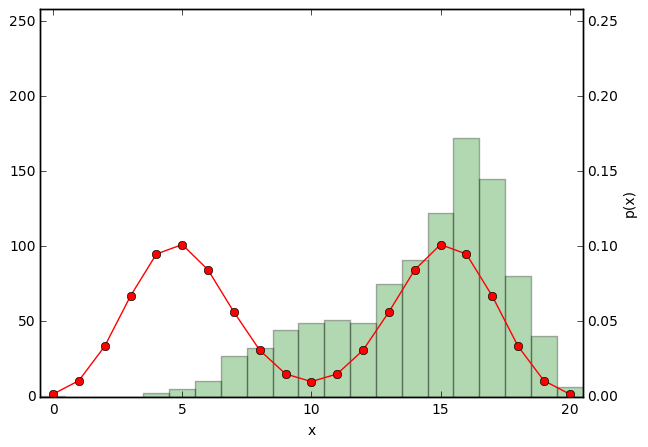

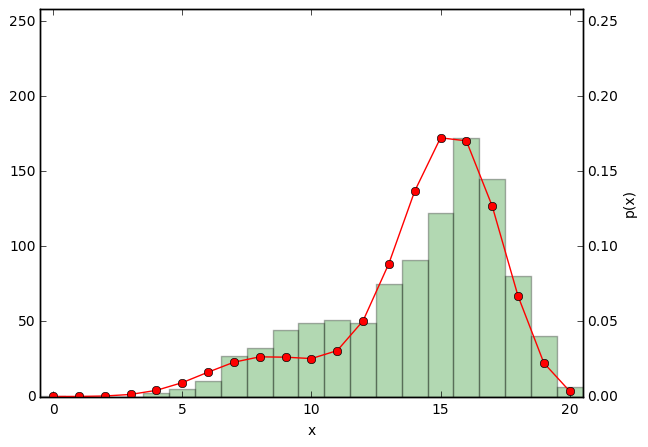

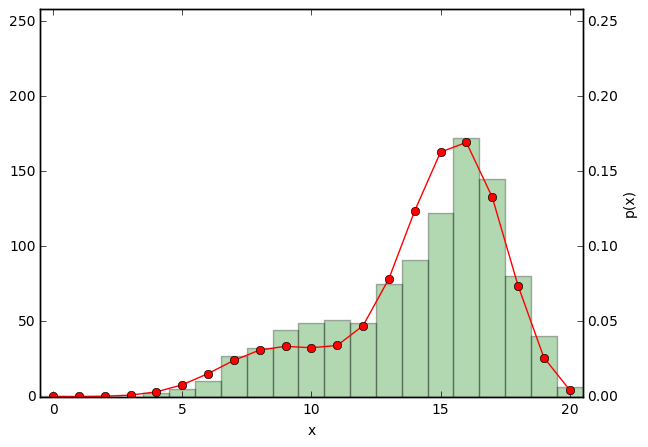

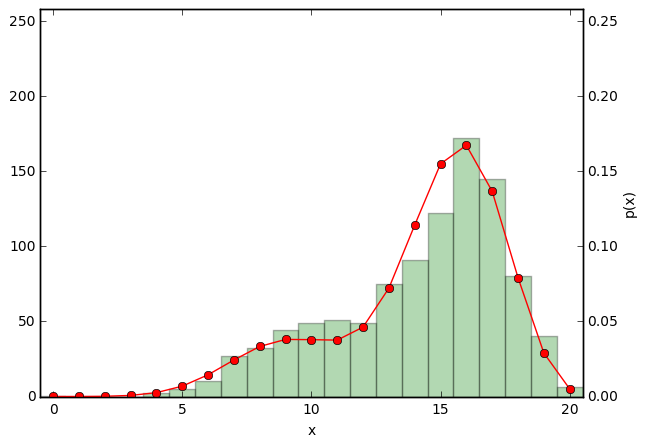

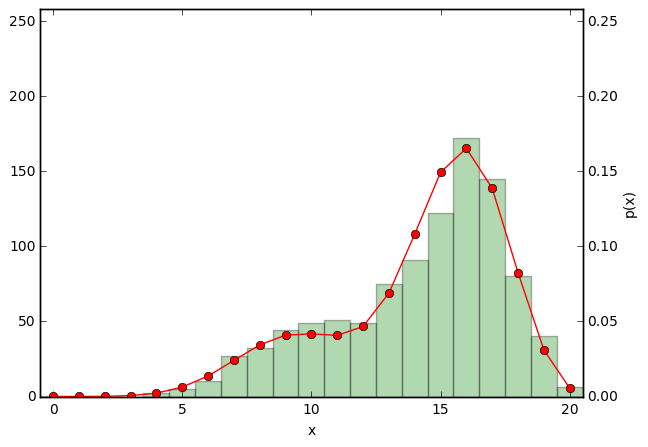

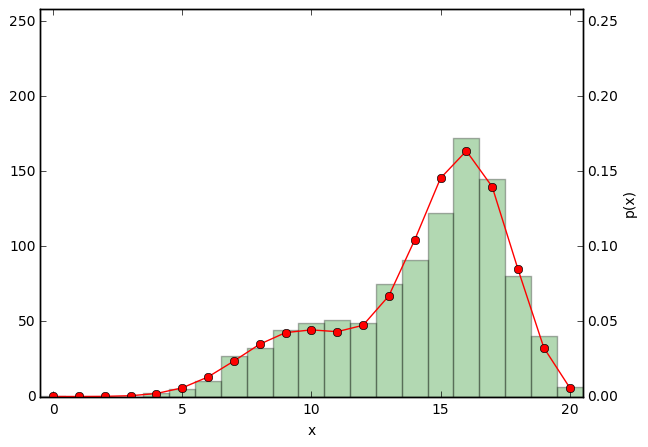

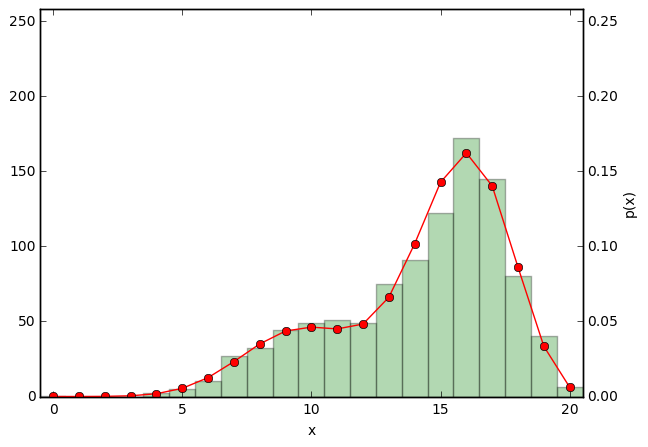

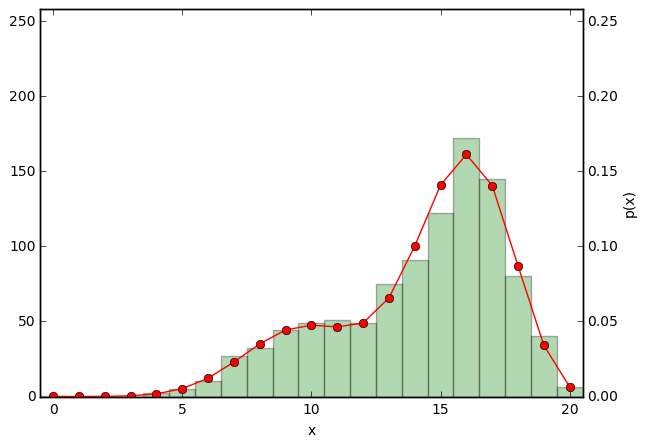

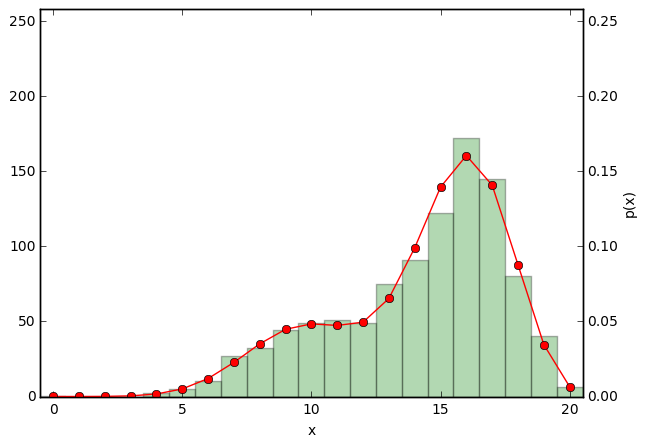

In [73]:
lam_res, p1_res, p2_res, loglik_res = em(data = utils.unknownData(), lam = .5, p1 = .25, p2 = .75)

## More Experiments (10 P)

Examine the behaviour of the EM algorithm for various combinations of data generation parameters and initializations (for generating various distributions, use the method `utils.generateData(...)`). In particular, find settings for which:

* The role of coins $A$ and $B$ are permuted between the data generating model and the learned model (i.e. $\hat p_1 \approx p_2$, $\hat p_2 \approx p_1$ and $\hat \lambda \approx 1-\lambda$).

* The EM procedure takes a long time to converge.

Print the parameters and log-likelihood objective at each iteration. Only display the plot for the converged model.

In [74]:
# define new EM routine (less plotting)
def em2(data, lam, p1, p2):
    it = 0
    cont = True
    loglik = -100
    while cont:
        it += 1
        loglik_old = loglik
        #print('old: %.3f'%(loglik_old))
        loglik = loglikelihood(data,lam,p1,p2)
        lam, p1, p2 = update_all(data, lam, p1, p2)
        print('it:%2d  lambda: %.2f  p1: %.2f  p2: %.2f  log-likelihood: %.3f'%(it, lam, p1, p2, loglik))
        cont = loglik - loglik_old > 0.001
    # plot
    probs = get_probs(data, lam, p1, p2)
    utils.plot(data, probs)
    return(lam, p1, p2, loglik)

#### Permutation Example
Strategy should be clear: Initialise in such a way that the model is 'tempted' to confuse $p_1$ with $p_2$, and $\lambda$ with $(1-\lambda)$. The model won't realise because it does not make a difference w.r.t. the log-likelihood.

it: 1  lambda: 0.70  p1: 0.17  p2: 0.81  log-likelihood: -4.743
it: 2  lambda: 0.71  p1: 0.18  p2: 0.80  log-likelihood: -2.871
it: 3  lambda: 0.72  p1: 0.18  p2: 0.81  log-likelihood: -2.868
it: 4  lambda: 0.72  p1: 0.18  p2: 0.81  log-likelihood: -2.868


(0.71780923053407875,
 0.18328132234262365,
 0.80810217665719442,
 -2.867924502328247)

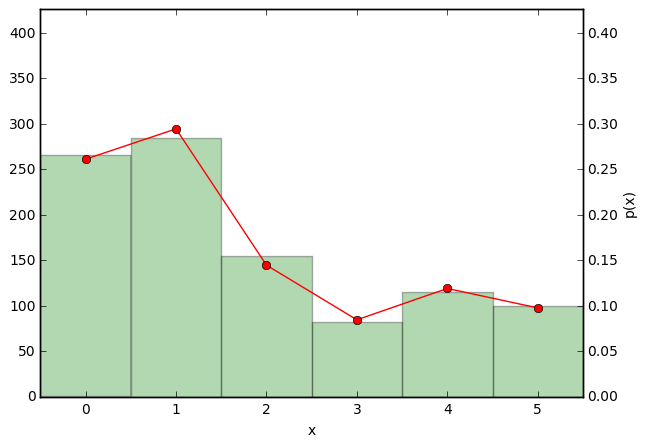

In [75]:
em2(data = utils.generateData(lam = 0.3, p1 = 0.8, p2 = 0.2, N = 1000, M = 5), lam = .5, p1 = 0.01, p2 = .99)

#### Slow Convergence Example
-- missing -- 